# Lecture 05

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('tab10')

In [2]:
!pip install scikit-learn==1.0.1

     |████████████████████████████████| 23.2 MB 6.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Tree Model

### Decision Tree basics

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris_df = iris['frame']
display(iris_df.info(), iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


![](https://www.researchgate.net/profile/Wolfgang-Engelmann/publication/265877256/figure/fig3/AS:669555605114885@1536645904238/Flower-of-a-plant-with-peduncle-a-calyx-consisting-of-sepals-petals-stamen-and-in.png)

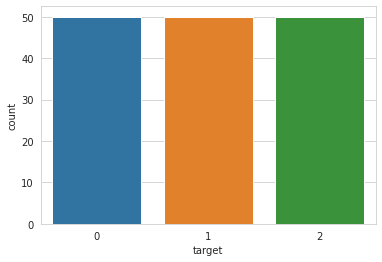

In [5]:
sns.countplot(data=iris_df, x='target', palette='tab10')

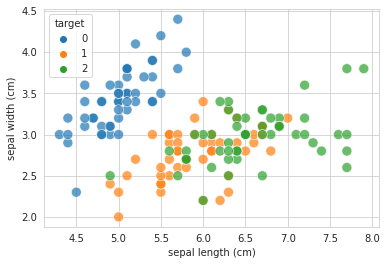

In [6]:
sns.scatterplot(
    data=iris_df, 
    x='sepal length (cm)', 
    y='sepal width (cm)', 
    hue='target', 
    s=100, alpha=0.7, 
    palette='tab10'
)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [9]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target']
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y, # Chia đều theo phân phối của y (0, 1, 2) -> đảm bảo cân bằng giữa tất cả các nhãn
    random_state=3110
)

In [10]:
y_test.value_counts()

2    15
1    15
0    15
Name: target, dtype: int64

In [11]:
tree = DecisionTreeClassifier(
    max_depth=5, # Giới hạn số tần của cây
    max_features=2 # Giới hạn số biến sử dụng để xây cây
)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [12]:
y_pred = tree.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  66.66666666666666


In [13]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'), 
    metrics.precision_score(y_test, y_pred, average='weighted'), 
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.670893585465332

0.6761904761904762

0.6666666666666666

In [17]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


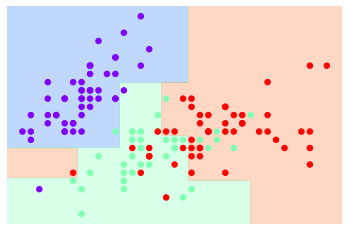

In [20]:
visualize_classifier(tree, X, y)

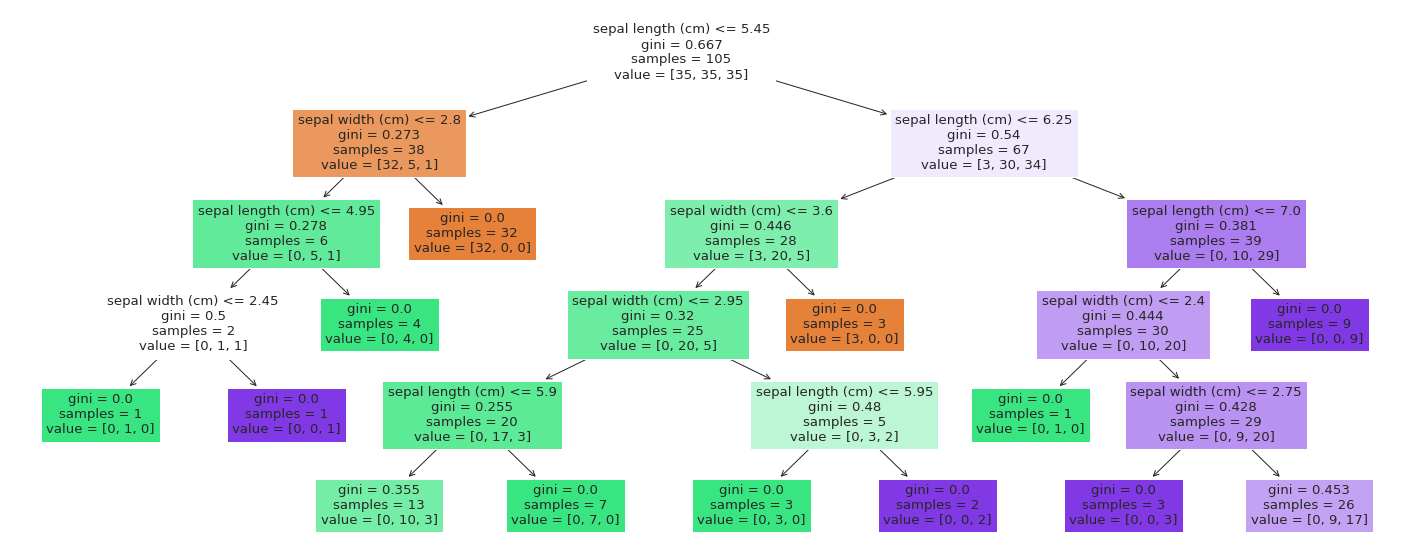

In [21]:
plt.figure(figsize=(25, 10))
_ = plot_tree(tree, feature_names=x_train.columns, max_depth=5, filled=True)

In [22]:
tree.feature_importances_

array([0.6966196, 0.3033804])

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
forest = RandomForestClassifier(
    # Nhận các tham số giống như Cây quyết định
    # max_features
    # max_depth
    # n_estimators= số lượng cây trong forest, mặc định = 100
    # random_state kiểm soát yếu tố ngẫu nhiên (random seed) của thuật toán
)

forest.fit(x_train, y_train)


RandomForestClassifier()

In [25]:
print(len(forest.estimators_))
forest.estimators_[:5]

100


[DecisionTreeClassifier(max_features='auto', random_state=1511410450),
 DecisionTreeClassifier(max_features='auto', random_state=1530516028),
 DecisionTreeClassifier(max_features='auto', random_state=539625863),
 DecisionTreeClassifier(max_features='auto', random_state=2097623103),
 DecisionTreeClassifier(max_features='auto', random_state=1950877271)]

In [26]:
y_pred = forest.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  68.88888888888889


In [27]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'), 
    metrics.precision_score(y_test, y_pred, average='weighted'), 
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.6861111111111111

0.6866767219708396

0.6888888888888889

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


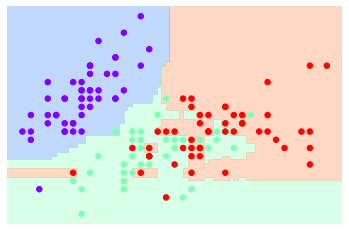

In [28]:
visualize_classifier(forest, X, y)

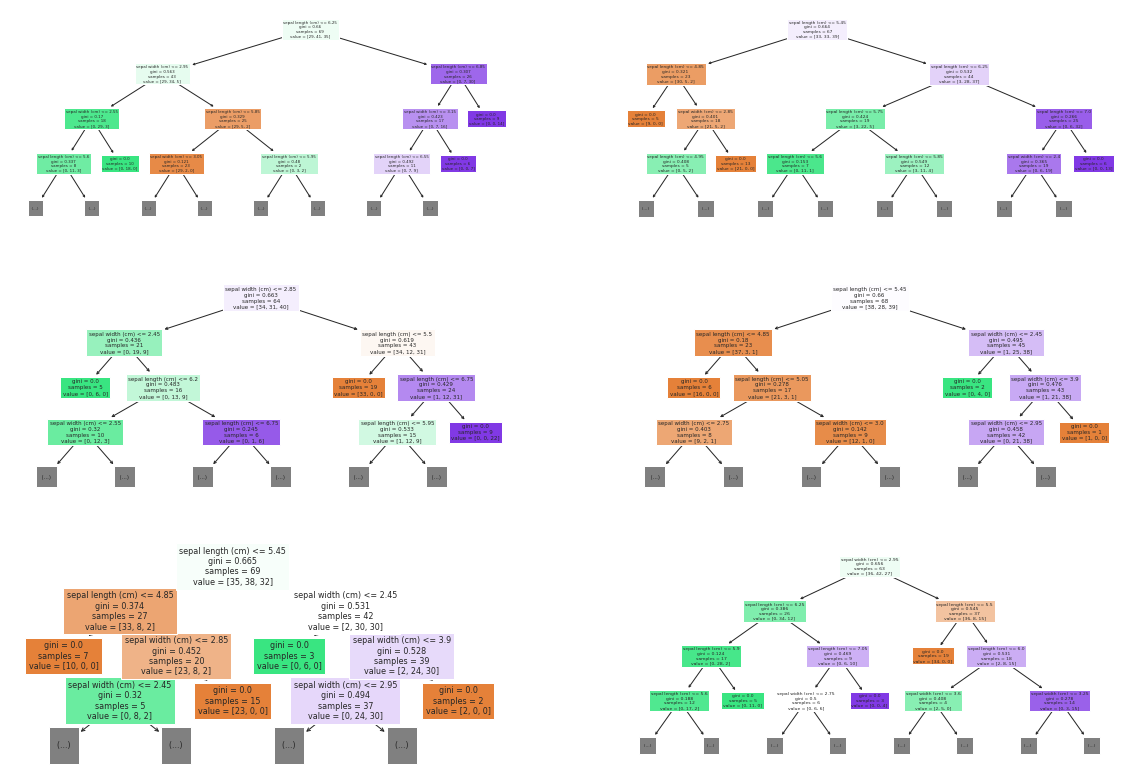

In [29]:
fig, axs = plt.subplots(3, 2, figsize=(20, 14))

for tree, ax in zip(forest.estimators_[:6], axs.ravel()):
    plot_tree(tree, feature_names=iris_df.columns, max_depth=3, filled=True, ax=ax)

### Câu hỏi thảo luận:
Khi xây dựng mô hình Random Forest hãy suy nghĩ về những câu hỏi sau:
1. Bao nhiêu cây là đủ?
2. Bao nhiêu tầng là đủ?
3. Bao nhiêu biến là đủ?

In [ ]:
RandomForestClassifier(
    n_estimators # Tối thiểu (total_features - max_featurés) + 1 # tối ưu: Tổ hợp chập (max_features) của (total_features)
    max_depth= # Thông thường theo log2 của số lượng biến sử dụng. Lựa chọn thêm 1 hệ số để điều chỉnh
    # một biến có được lặp lại trên nhiều node hay ko. Thông thường: log2(max_features) + 2 (disclaimer: kinh nghiệm)
    max_features # sqrt(total_feature). Ví dụ: 100 biến => sqrt(100) = 10
    # Thông thường ko nên sử dụng dưới 15 (tương ứng với 4 tầng cây)
    # Tuy nhiên thực tế cần cân bằng giữa max_features và n_estimator và khả năng tính toán của hệ thống
    max_sample=0.8 # dựa vào số lượng quan sát của bộ dữ liệu và bộ nhớ của máy
)

In [30]:
display(
    iris_df.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


None

### Bài tập thực hành:
1. Biến đổi dữ liệu Iris thành bài toán Binary (chỉ 0 và 1: 2 lớp). Gộp lớp 1 và 2 thành 1 nhóm.
2. Xây dựng mô hình logistic cho dữ liệu Iris
3. So sánh với kết quả của mô hình Cây (cây hay rừng đều đc)

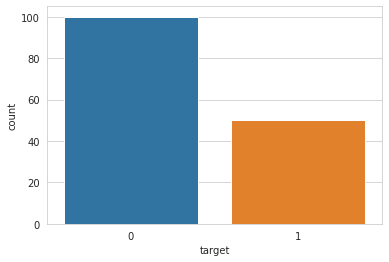

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler

y_binary = y.eq(1).astype(int)
sns.countplot(x=y_binary)

In [44]:
X = iris_df.drop(columns='target')
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, 
                                                    stratify=y_binary, random_state=30)

In [46]:
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred = logit_model.predict(x_test)

In [48]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        30
           1       0.70      0.47      0.56        15

    accuracy                           0.76        45
   macro avg       0.74      0.68      0.70        45
weighted avg       0.75      0.76      0.74        45



In [49]:
display(
    metrics.accuracy_score(y_test, y_pred),
    metrics.f1_score(y_test, y_pred), 
    metrics.precision_score(y_test, y_pred), 
    metrics.recall_score(y_test, y_pred)
)

0.7555555555555555

0.56

0.7

0.4666666666666667

In [53]:
scaler = RobustScaler()
# StandardScaler ~ lấy zscore toàn bộ dữ liệu - theo độ lệch chuẩn
# RobustScaler ~ lấy zscore toàn bộ dữ liệu - theo IQR (25% - 75%)
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333],
       [-0.30769231,  1.8       , -0.75714286, -0.6       ],
       [-0.92307692,  0.8       , -0.84285714, -0.66666667],
       [-0.61538462,  0.8       , -0.81428571, -0.73333333],
       [-1.07692308, -0.2       , -0.84285714, -0.73333333],
       [-0.69230769,  0.2       , -0.81428571, -0.8       ],
       [-0.30769231,  1.4       , -0.81428571, -0.73333333],
       [-0.76923077,  0.8       , -0.78571429, -0.73333333],
       [-0.76923077,  0.        , -0.84285714, -0.8       ],
       [-1.15384615,  0.        , -0.92857143, -0.8       ],
       [ 0.        ,  2.        , -0.9       , -0.73333333],
       [-0.07692308,  2.8       , -0.81428571, -0.6       ],
       [-0.30769231,  1.

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, 
                                                    stratify=y_binary, random_state=30)
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
display(
    metrics.accuracy_score(y_test, y_pred),
    metrics.f1_score(y_test, y_pred), 
    metrics.precision_score(y_test, y_pred), 
    metrics.recall_score(y_test, y_pred)
)

0.7111111111111111

0.48

0.6

0.4

## Support Vector Machines (SVM - Máy véc-tơ hỗ trợ)


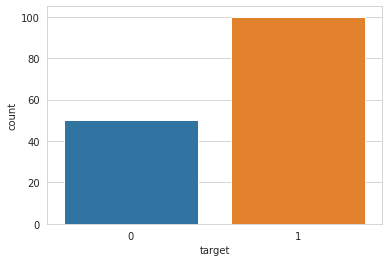

In [55]:
y_binary = y.gt(0).astype(int) # (y > 0).astype(int) # cách viết tiêu chuẩn của spark ~ pyspark
# gt ~ greater than ~ >
# ge ~ >=
# eq ~ ==
# ne ~ !=
# lt ~ <
# le ~ <=
# (+ - * /) nên sử dụng hàm của pandas
# (arr1 + 1) => (arr1.add(1))
# (arr1 + 1)/10 => arr1.add(1).div(10)
sns.countplot(x=y_binary)

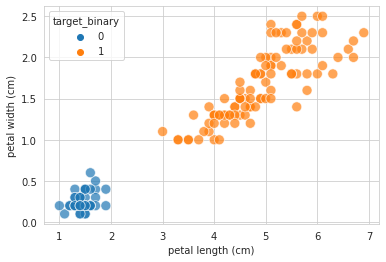

In [56]:
iris_df['target_binary'] = y_binary
sns.scatterplot(
    data=iris_df, x='petal length (cm)', 
    y='petal width (cm)', hue='target_binary', 
    s=100, alpha=0.7, palette='tab10'
)

In [57]:
X, y = iris_df[['petal length (cm)', 'petal width (cm)']], iris_df['target_binary']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [61]:
from sklearn.svm import SVC # Support Vector Classifier

svc = SVC(kernel='linear') # Initializing model # C = 1.0
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [62]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  100.0


In [ ]:
# Decision Tree va Random Forest cho ket qua bao nhieu?

In [63]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


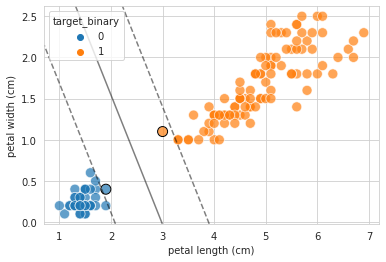

In [64]:
ax = sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [66]:
display(
    svc.decision_function(x_test),
    svc.predict(x_test)
)

array([ 2.72000003,  4.64000003,  5.45000003, -1.70999997, -1.48999997,
        1.93000003, -1.48999997,  2.40000003,  3.26000003,  2.76000003,
        4.13000003,  2.72000003, -2.03999997, -1.37999997,  4.24000003,
        1.85000003, -1.70999997, -1.52999997, -1.37999997, -1.37999997,
       -1.26999997,  4.05000003,  2.03000003, -1.66999997,  2.83000003,
        3.01000003, -1.48999997, -1.59999997,  1.49000003,  2.69000003,
        1.05000003,  3.37000003,  4.46000003, -1.59999997, -1.52999997,
        2.72000003,  4.56000003,  1.59000003])

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
svc.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

### Beyond linear boundaries: Kernel SVM

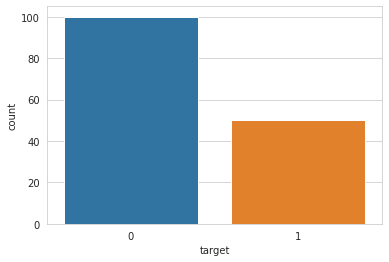

In [73]:
y_binary = iris_df['target'].gt(1).astype(int)
sns.countplot(x=y_binary)

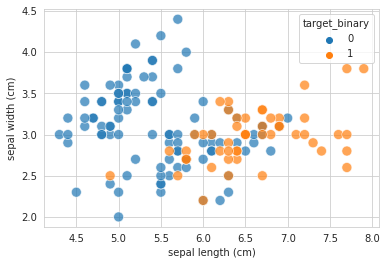

In [74]:
iris_df['target_binary'] = y_binary
sns.scatterplot(
    data=iris_df, x='sepal length (cm)', 
    y='sepal width (cm)', hue='target_binary', 
    s=100, alpha=0.7, palette='tab10'
)

In [117]:
X, y = iris_df[['sepal length (cm)', 'sepal width (cm)']], iris_df['target_binary']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [118]:
svc = SVC(kernel='linear') # C = 1.0
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [119]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  86.8421052631579


In [120]:
display(
    metrics.accuracy_score(y_test, y_pred),
    metrics.f1_score(y_test, y_pred), 
    metrics.precision_score(y_test, y_pred), 
    metrics.recall_score(y_test, y_pred)
)

0.868421052631579

0.761904761904762

0.6666666666666666

0.8888888888888888

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


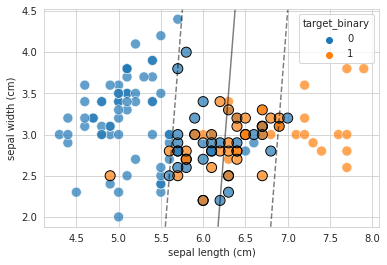

In [79]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target_binary', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

In [80]:
svc = SVC(kernel='rbf') # C = 1.0 # rbf là thông số mặc định của SVC
svc.fit(x_train, y_train)

SVC()

In [81]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  81.57894736842105


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


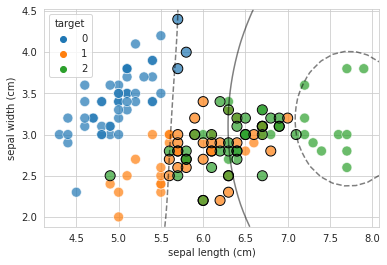

In [82]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)

### Tuning the SVM: Softening Margins

In [96]:
svc = SVC(kernel='rbf', C=1000) # C = 100.0
svc.fit(x_train, y_train)

SVC(C=1000)

In [97]:
y_pred = svc.predict(x_test)
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy score:  84.21052631578947


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


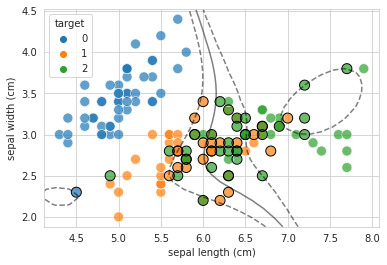

In [98]:
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(svc, ax=ax, plot_support=True)